Proportional gain amplifies the “present” (current time-step) error, with no consideration of past or future errors.

In [1]:
## open_controller.py
##################################################################################
# This will be our control class that over the course of the next lessons will 
# become more advance!
##################################################################################

# Create an Open_Controller class!
class Open_Controller:
    # Define the class initalization sequence! 
    def __init__(self, start_time = 0):
        
        # Create a class variable to store the start time!
        self.start_time_ = start_time
        
        # Create a class variable to store the control effort!
        self.u = 0
        
        # Create a class variable to store the last timestamp!
        self.last_timestamp_ = 0
        
        # Create a class variable to store our set point!
        self.set_point_ = 0
        
        # Create a class variable to all applied control efforts!
        self.effort_applied = []

    # Set the altitude set point
    def setTarget(self, target):
        self.set_point_ = float(target)
     
    # Set the desired control effort   
    def setControlEffort(self, control_effort):
        self.u = float(control_effort)

    # Retrive the current control effort
    def getControlEffort(self,time):
        # Store the last time stamp!
        self.last_timestamp_ = time
        
        # Store control effort applied!
        self.effort_applied.append(self.u)
        
        return self.u

In [2]:
#quad1d_eom.py
import numpy as np
import matplotlib.pyplot as plt
# from open_controller import Open_Controller

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
# This file represents the dynamical equations of motion for the 1D quadrotor
##################################################################################

def ydot(y, t, controller):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - controller.last_timestamp_
    # Control effort
    u = controller.getControlEffort(t)

    ### State derivatives
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]

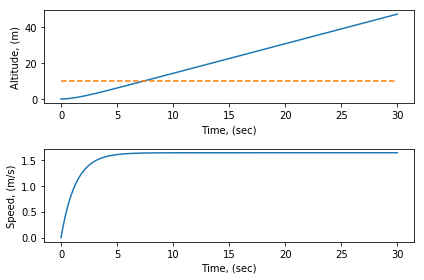

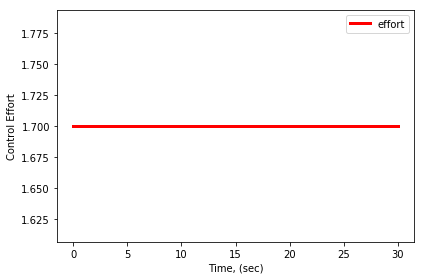

The rise time is 7.455 seconds
The percent overshoot is 369.7%
The offset from the target at 30 seconds is 36.974 meters


In [3]:
## hover_plot.py
import numpy as np
import matplotlib.pyplot as plt
# from open_controller import Open_Controller
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# Here we are going to apply a continuous and constant control effort with a value 
# of 1.7!
control_effort = 1.7
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simulation points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of Open_Controller class
controller = Open_Controller()

# Set our contstant control effort
controller.setControlEffort(control_effort)

# Set altitude target
r = 10 # meters
controller.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,controller)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
# Plot 1: This is the altitude of our quad copter as a function of time!
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

# Plot 2: This is the speed of our quad copter as a function of time!
ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

# Plot 3: This is the control effort applied to our quad copter as a function of time!
fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, controller.effort_applied, label='effort', linewidth=3, color = 'red')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The offset from the target at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))

## P Controller

In [21]:
##################################################################################
# Your goal is to follow the comments and complete the the tasks asked of you.
# Take this time to try and understand the workings of the empty class structure.
# The following quizzes will assume a understanding of a working class strucutre.
#
# Good luck designing your proportional controller!
#
##################################################################################

class P_Controller:
    def __init__(self, kp = 0.0, start_time = 0):
        
        # The P controller can be initalized with a specific kp value
        self.kp_ = float(kp)
        
        # Create internal class variables for 
        # set_point_ and set it to 0.0, and start_time_
        # and set it to the start_time variable.
        ########################################
        self.set_point_ = 0.0
        self.start_time_ = start_time
        ########################################

        # Store last timestamp
        self.last_timestamp_ = 0.0

        # Control effort history
        self.u_p = [0]

    # Set the altitude set point
    def setTarget(self, target):
        self.set_point_ = float(target)

    def setKP(self, kp):
        # Set the internal kp_ value with the provided variable
        # See setTarget if you are confused on how to do so
        ########################################
        self.kp_ = float(kp)
        ########################################

    def update(self, measured_value, timestamp):
        # Calculate delta_time using the last_timestamp_
        # and the provided timestamp argument
        ########################################
        delta_time = timestamp - self.last_timestamp_
        ########################################
        
        if delta_time == 0:
            # Delta time is zero
            return 0
        
        # Calculate the error as the differnce between
        # the set_point_ and the measured_value
        ########################################
        error = self.set_point_ - measured_value
        ########################################
        
        # Set the last_timestamp_ to current  timestamp
        ########################################
        self.last_timestamp_ = timestamp
        ########################################

        # Calculate the proportional error here. Be sure to access the 
        # the internal Kp class variable
        ########################################
        p = self.kp_ * error
        ########################################

        # Set the control effort
        # u is the sum of all your errors. In this case it is just 
        # the proportional error.
        ########################################
        u = p
        ########################################
        
        # Here we are storing the control effort history for post control
        # observations. 
        self.u_p.append(p)

        return u

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# from p_controller import P_Controller

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
# This file represents the dynamical equations of motion for the 1D quadrotor
##################################################################################

def ydot(y, t, p):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - p.last_timestamp_
    # Control effort
    u = p.update(y0,t)

    ### State derivatives
    # if altitude = 0
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]

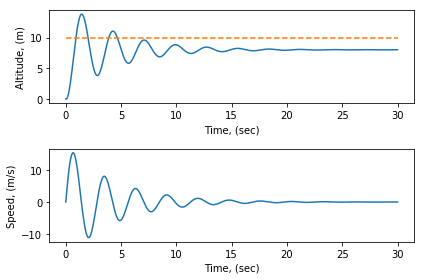

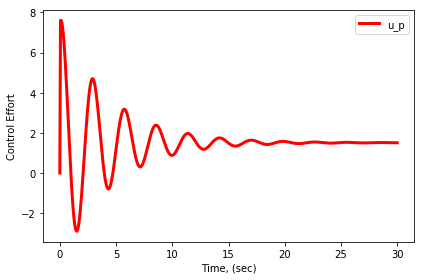

The rise time is 0.962 seconds
The percent overshoot is 38.2%
The steady state offset at 30 seconds is 1.981 meters


In [28]:
import numpy as np
import matplotlib.pyplot as plt
##################################################################################
##################################################################################
# from p_controller import P_Controller

##################################################################################
##################################################################################
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# This code is what will be executed and what will produce your results
# For this quiz you need to set kp below to your desired value
# Then modify p_controller.py to build out your P controller
kp = 0.76
# Note that kp needs to be set to 0.76 in order to pass the project
# You are encouraged to change Kp in order to observe the effects
# What happens when Kp is really small?
# What happens when Kp is really large?
# Do we notice anything relating Kp and the control effort?
# Observe the steady state offset and the percent overshoot!
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simultion points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of P_Controller class
p = P_Controller()

# Set the Kp value of the controller
p.setKP(kp)

# Set altitude target
r = 10 # meters
p.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,p)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, p.u_p, label='u_p', linewidth=3, color = 'red')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))


**What happens when Kp is large?**
    
* Rise time decreases but overshoot increases along with the osscilations

**What happens when Kp is small?**
    
* Rise time increases but overshoot and osscillations decreases
        
**Do we reach our desired goal?**
    
* No
    
**How does control effort vary with different Kp values?**
    
* Effort increases with increasing kp values

**How does the steady state offset and overshoot vary with different Kp values?**
    
* offset increases as the kp in creases

## PD controller


In [32]:
##################################################################################
# Your goal is to follow the comments and complete the the tasks asked of you.
#
# Good luck designing your proportional derivative controller!
#
##################################################################################

class PD_Controller:
    def __init__(self, kp = 0.0, kd = 0.0, start_time = 0):
        
        # The PD controller can be initalized with a specific kp value
        # and kd value
        self.kp_ = float(kp)
        self.kd_ = float(kd)
        
        # Define last_error_ and set to 0.0
        ########################################
        self.last_error=0.0
        ########################################

        # Store relevant data
        self.last_timestamp_ = 0.0
        self.set_point_ = 0.0
        self.start_time_ = start_time
        self.error_sum_ = 0.0

        # Control effort history
        self.u_p = [0]
        self.u_d = [0]

    def setTarget(self, target):
        self.set_point_ = float(target)

    def setKP(self, kp):
        self.kp_ = float(kp)
        
    def setKD(self, kd):
        # Set the internal kd_ value with the provided variable
        ########################################
        self.kd_=float(kd)
        ########################################

    def update(self, measured_value, timestamp):
        delta_time = timestamp - self.last_timestamp_
        if delta_time == 0:
            # Delta time is zero
            return 0
        
        # Calculate the error 
        error = self.set_point_ - measured_value
        
        # Set the last_timestamp_ 
        self.last_timestamp_ = timestamp

        # Find error_sum_
        self.error_sum_ += error * delta_time
        
        # Calculate the delta_error
        ########################################
        delta_error=error-self.last_error
        ########################################
        
        # Update the past error with the current error
        ########################################
        self.last_error=error
        ########################################

        # Proportional error
        p = self.kp_ * error
       
        # Calculate the derivative error here. Be sure to access the 
        # the internal Kd class variable
        ########################################
        d = self.kd_*delta_error/delta_time
        ########################################
        
        # Set the control effort
        # u is the sum of all your errors. In this case it is just 
        # the proportional and derivative error.
        ########################################
        u = p+d
        ########################################
        
        # Here we are storing the control effort history for post control
        # observations. 
        self.u_p.append(p)
        self.u_d.append(d)

        return u

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# from pd_controller import PD_Controller

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
##################################################################################

def ydot(y, t, pd):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - pd.last_timestamp_
    # Control effort
    u = pd.update(y0,t)

    ### State derivatives
    # if altitude = 0
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]

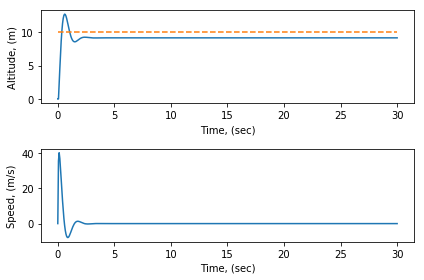

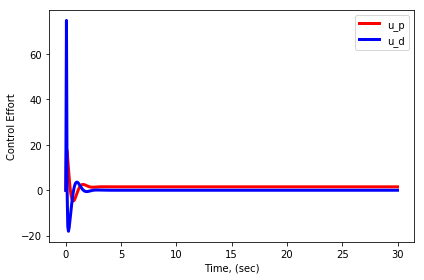

The rise time is 0.361 seconds
The percent overshoot is 26.9%
The steady state offset at 30 seconds is 0.858 meters


In [34]:
import numpy as np
import matplotlib.pyplot as plt
# from pd_controller import PD_Controller
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# This code is what will be executed and what will produce your results
# For this quiz you need to set kd below to your desired value
# Then modify pd_controller.py to build out your PD controller
kp = 1.76
kd = 0.45
# Note that kd needs to be set to 0.45 in order to pass the project
# You are encouraged to change Kd in order to observe the effects
# What happens when Kd is really small?
# What happens when Kd is really large?
# Do we notice anything relating Kd and the control effort?
# Observe the percent overshoot!
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simultion points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of PI_Controller class
pd = PD_Controller()

# Set the Kp value of the controller
pd.setKP(kp)

# Set the Kd value of the controller
pd.setKD(kd)

# Set altitude target
r = 10 # meters
pd.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,pd)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, pd.u_p, label='u_p', linewidth=3, color = 'red')
ax3.plot(time, pd.u_d, label='u_d', linewidth=3, color = 'blue')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))

## PI Controller

With the addition of integral gain, you will able to minimize SSE; however, this may come at the expense of settling time and percent overshoot. 

In [24]:
##################################################################################
# Your goal is to follow the comments and complete the the tasks asked of you.
#
# Good luck designing your proportional integral controller!
#
##################################################################################


class PI_Controller:
    def __init__(self, kp = 0.0, ki = 0.0, start_time = 0):
        
        # The PI controller can be initalized with a specific kp value
        # and ki value
        self.kp_ = float(kp)
        self.ki_ = float(ki)

        # Define error_sum_ and set to 0.0
        ########################################
        self.error_sum=0.0
        ########################################

        # Store relevant data
        self.last_timestamp_ = 0.0
        self.set_point_ = 0.0
        self.start_time_ = start_time

        # Control effort history
        self.u_p = [0]
        self.u_i = [0]

    def setTarget(self, target):
        self.set_point_ = float(target)

    def setKP(self, kp):
        self.kp_ = float(kp)
        
    def setKI(self, ki):
        # Set the internal ki_ value with the provided variable
        ########################################
        self.ki_=ki
        ########################################

    def update(self, measured_value, timestamp):
        delta_time = timestamp - self.last_timestamp_
        if delta_time == 0:
            # Delta time is zero
            return 0
        
        # Calculate the error 
        error = self.set_point_ - measured_value
        
        # Set the last_timestamp_ 
        self.last_timestamp_ = timestamp

        # Calculate the error_sum_
        ########################################
        self.error_sum+=error*delta_time
        ########################################
        
        # Proportional error
        p = self.kp_ * error
       
        # Calculate the integral error here. Be sure to access the 
        # the internal Ki class variable
        ########################################
        i = self.error_sum*self.ki_
        ########################################
        
        # Set the control effort
        # u is the sum of all your errors. In this case it is just 
        # the proportional and integral error.
        ########################################
        u = p+i
        ########################################
        
        # Here we are storing the control effort history for post control
        # observations. 
        self.u_p.append(p)
        self.u_i.append(i)

        return u

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# from pi_controller import PI_Controller

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
##################################################################################

def ydot(y, t, pi):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - pi.last_timestamp_
    # Control effort
    u = pi.update(y0,t)

    ### State derivatives
    # if altitude = 0
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]

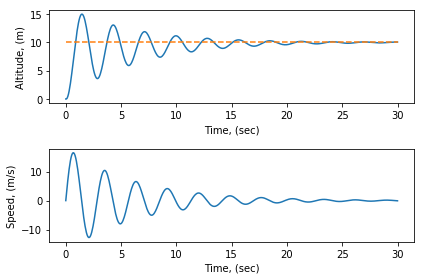

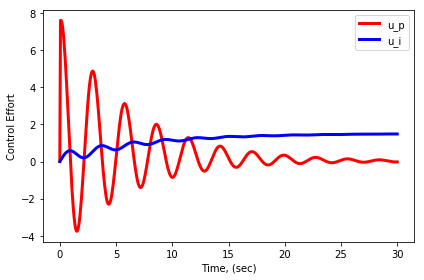

The rise time is 0.902 seconds
The percent overshoot is 49.4%
The steady state offset at 30 seconds is 0.022 meters


In [27]:
import numpy as np
import matplotlib.pyplot as plt
# from pi_controller import PI_Controller
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# This code is what will be executed and what will produce your results
# For this quiz you need to set ki below to your desired value
# Then modify pi_controller.py to build out your PI controller
kp = 0.76
ki = 0.1
# Note that ki needs to be set to 0.10 in order to pass the project
# You are encouraged to change Ki in order to observe the effects
# What happens when Ki is really small?
# What happens when Ki is really large?
# Do we notice anything relating Ki and the control effort?
# Observe the steady state offset and the percent overshoot!
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simulation points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of PI_Controller class
pi = PI_Controller()

# Set the Kp value of the controller
pi.setKP(kp)

# Set the Ki value of the controller
pi.setKI(ki)

# Set altitude target
r = 10 # meters
pi.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,pi)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, pi.u_p, label='u_p', linewidth=3, color = 'red')
ax3.plot(time, pi.u_i, label='u_i', linewidth=3, color = 'blue')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))


| Parameters    |After Decrement|After Increcement   |Pred Result            |Actual Result       |
| ------------- |:-------------:| ------------------:|----------------------:|-------------------:|
| Rise Time     | 0.902         | 0.842              |Decrease               |Decrease            |
| Overshoot     | 49.2%         |   70.5%            |Increase               |Increase            |
| Setting Time  | less          |    More            |Increase               |Increase            |
| S.S.Error     | 0.022         |    3.59            |Increase               |Decrease            |
| Stability     | Yes           |    Not Very        |Decrease               |Decrease            |

# PID Controller

In [35]:
##################################################################################
#
# No changes need to be made to the this code. Yay! 
#
##################################################################################

class PIDController:
    def __init__(self, kp = 0.0, ki = 0.0,  kd = 0.0, start_time = 0):
        
        # The PID controller can be initalized with a specific kp value
        # ki value, and kd value
        self.kp_ = float(kp)
        self.ki_ = float(ki)
        self.kd_ = float(kd)

        # Store relevant data
        self.last_timestamp_ = 0.0
        self.set_point_ = 0.0
        self.start_time_ = start_time
        self.error_sum_ = 0.0
        self.last_error_ = 0.0

        # Control effort history
        self.u_p = [0]
        self.u_i = [0]
        self.u_d = [0]

    def setTarget(self, target):
        self.set_point_ = float(target)

    def setKP(self, kp):
        self.kp_ = float(kp)
        
    def setKI(self, ki):
        self.ki_ = float(ki)
       
    def setKD(self, kd):
        self.kd_ = float(kd)

    def update(self, measured_value, timestamp):
        delta_time = timestamp - self.last_timestamp_
        if delta_time == 0:
            # Delta time is zero
            return 0
        
        # Calculate the error 
        error = self.set_point_ - measured_value
        
        # Set the last_timestamp_ 
        self.last_timestamp_ = timestamp

        # Sum the errors
        self.error_sum_ += error * delta_time
        
        # Calculate the delta_error
        delta_error = error - self.last_error_
        
        # Update the past error with the current error
        self.last_error_ = error
        
        # Proportional error
        p = self.kp_ * error
       
        # Integral error
        i = self.ki_ * self.error_sum_
       
        # Derivative error 
        d = self.kd_ * (delta_error / delta_time)

        # Set the control effort
        u = p + i + d
        
        # Here we are storing the control effort history for post control
        # observations. 
        self.u_p.append(p)
        self.u_i.append(i)
        self.u_d.append(d)

        return u


In [36]:
import numpy as np
import matplotlib.pyplot as plt
# from pid_controller import PIDController

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
##################################################################################

def ydot(y, t, pid):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - pid.last_timestamp_
    # Control effort
    u = pid.update(y0,t)

    ### State derivatives
    # if altitude = 0
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]

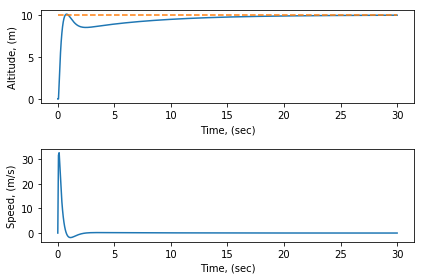

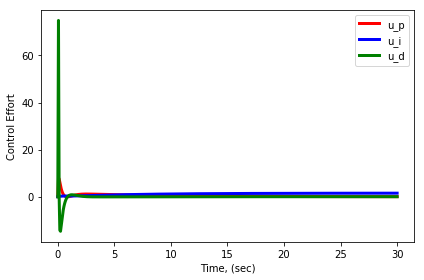

The rise time is 0.721 seconds
The percent overshoot is 1.0%
The steady state offset at 30 seconds is 0.028 meters


In [39]:
import numpy as np
import matplotlib.pyplot as plt
# from pid_controller import PIDController
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# This code is what will be executed and what will produce your results
# For this quiz you need to set kp, ki and kd so that you have a steady state 
# error offset less than 0.029 m and your percent overshoot is less than 4.0 %.
# Its encouraged to try for less though!!
kp = 0.76
ki = 0.1
kd = 0.45
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simultion points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of PID_Controller class
pid = PIDController()

# Set the Kp value of the controller
pid.setKP(kp)

# Set the Ki value of the controller
pid.setKI(ki)

# Set the Kd value of the controller
pid.setKD(kd)

# Set altitude target
r = 10 # meters
pid.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,pid)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, pid.u_p, label='u_p', linewidth=3, color = 'red')
ax3.plot(time, pid.u_i, label='u_i', linewidth=3, color = 'blue')
ax3.plot(time, pid.u_d, label='u_d', linewidth=3, color = 'green')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))

## Some Points to notice
| Parameters    |K_P                 |K_D                    |K_I                 |            
| ------------- | ------------------:|----------------------:|-------------------:|
| Rise Time     |    Decrease        |Decrease               |Minor change        |
| Overshoot     |    Increase        |Increase               |Decrease            |
|Settling Time  |    small change    |Increase               |Decrease            |
| S.S.Error     |    Decrease        |Eliminate              |No Effect(In Theory)|
| Stability     |    degrade         |Degrade                |Improve if kd small |           |

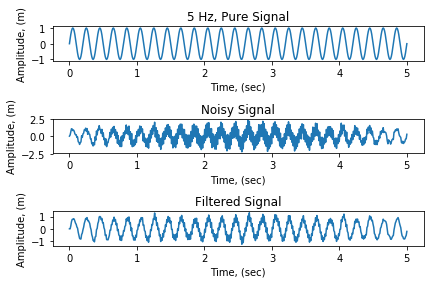

In [50]:
import numpy as np
import matplotlib.pyplot as plt

f1 = 5 # Hertz
w1 = 2*np.pi*f1 # angular frequency
f2 = 50 # Hertz
w2 = 2*np.pi*f2 # angular frequency

# Create an array of time points
N = 500
t = np.linspace(0,5,N)

# Create signals
pure = np.sin(w1*t) # pure sine wave
noise = np.sin(w2*t) + np.random.normal(0, 0.2, N) # Normally distributed random noise
 # 0   = mean of the normal distribution
 # 0.2 = standard deviation of the normal distribution
 # N   = number of elements in the array
signal = pure + noise # noisy sine wave

#################################################
### Code your recursive low pass filter below ###
#################################################
###  Use test run to visualize your solution  ###
#################################################
### Then submit it when your done to grade it ###
#################################################

# Recursive low-pass filter
alpha = 0.1 # alpha closer to zero means stronger smoothing effect
          # be sure to try differnt values and observe its effects in the plot below
filtered = np.zeros(N) # initialize array to store values
for i in range(N):
    if i > 1:
        # Fill out the filtered[i] variable with the code for your low pass filer
        filtered[i] = filtered[i-1]+alpha*(signal[i]-filtered[i-1])


fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(t, pure)
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Amplitude, (m)')
ax1.set_title('5 Hz, Pure Signal')

ax2 = fig.add_subplot(312)
ax2.plot(t, signal)
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Amplitude, (m)')
ax2.set_title('Noisy Signal')

ax3 = fig.add_subplot(313)
ax3.plot(t, filtered)
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Amplitude, (m)')
ax3.set_title('Filtered Signal')

plt.tight_layout()
plt.show()